# Ultimate Take Home Challenge EDA

1) Read in data and make initial observations

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


This is a simple 1 column dataframe of login times in datetime format

2) Aggregate the data into 15 minute intervals

In [5]:
df.set_index('login_time', inplace=True)
df['Count'] = 1
df.sort_index(inplace=True)
df_agg = df.resample("15min").sum()

In [6]:
df_agg.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
df_agg['Count'].sum()

93142

This confirms that all the data was preserved as the sum of count is equal to how many rows were in the data prior to aggregation

3) Visualize data to find trends and analyze data

In [8]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


The data contains time stamps between January 1st of 1970 till April 13th of the same year

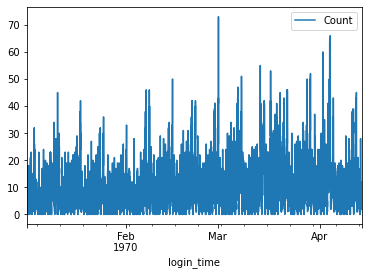

In [9]:
# Plot data
df_agg.plot()
plt.show()

Login frequency seems to rise in fairly consistent intervals that are short lived. This is likely on weekends but more analysis is necessary to be sure

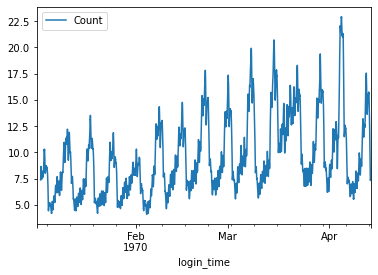

In [10]:
# Plot data in a smoother fashion
df_agg.rolling(window=120).mean().plot()
plt.show()

While the rises are easier to see now its still hard to say for certain that they take place on weekends. Next I'll look at the month of March to see what the data looks like there

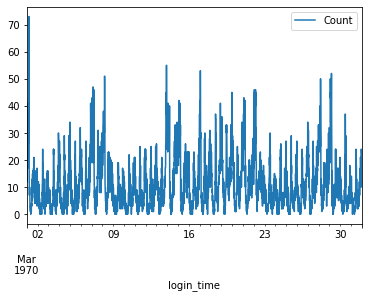

In [11]:
df_agg.loc['1970-03'].plot()
plt.show()

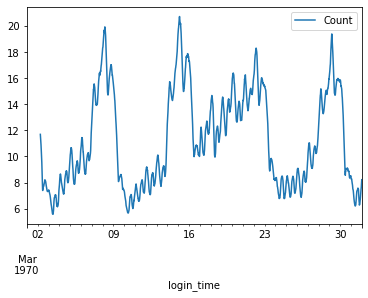

In [12]:
df_agg.loc['1970-03'].rolling(window=120).mean().plot()
plt.show()

Since the spikes occur a week apart it is likely the weekend causing the spikes. However, the rises on the weekend aren't consistent either so there seems to be some variability there as well. Next I'll look at a week in March

In [13]:
datetime.datetime(1970, 3, 1).weekday()

6

This indicates that March 1st was a Sunday. I'll look at the first 7 days then

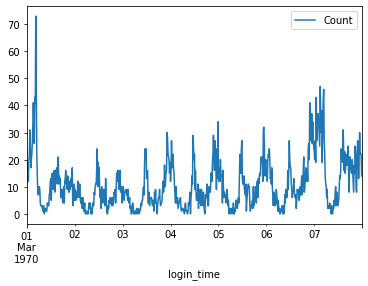

In [14]:
df_agg.loc['1970-03-01':'1970-03-07'].plot()
plt.show()

Looks like the high points are at the ends of this week which would be Sunday on the left and Saturday on the right. Weekends are definitely the days with the most logins. Next I'll zoom in on the weekend of March 7th and 8th to see where the spikes are

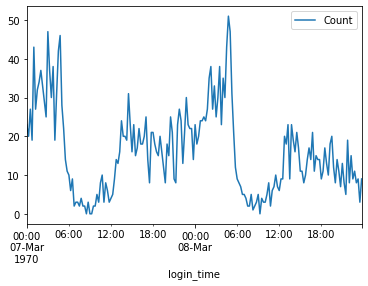

In [15]:
df_agg.loc['1970-03-07':'1970-03-08'].plot()
plt.show()

Looks like logins are highest in the few hours starting at midnight on Saturday and Sunday. Next I'll look at 2 weekdays to see if there are spikes in them as well

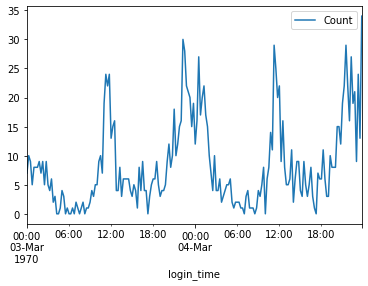

In [16]:
df_agg.loc['1970-03-03':'1970-03-04'].plot()
plt.show()

Here the spikes are at noon and also at midnight. Let's observe the same days in February and see if these patterns hold up. Since February was 28 days in 1970 (not a leap year) the same days will be the same day of the week

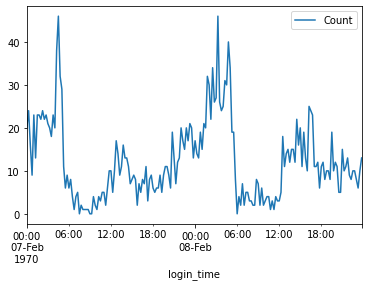

In [17]:
df_agg.loc['1970-02-07':'1970-02-08'].plot()
plt.show()

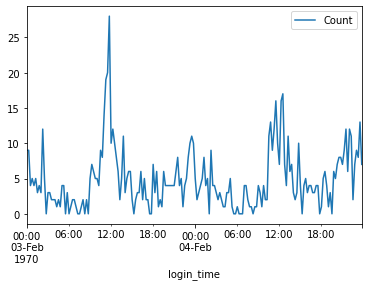

In [18]:
df_agg.loc['1970-02-03':'1970-02-04'].plot()
plt.show()

While the graphs are a little different the overall trends remain (although the weekday in February had a very high peak at noon)

I can make 2 conclusions from this analysis:

1) Logins on weekends were highest right around midnight
2) Logins on weekdays were highest around noon and midnight depending on the day